In [1]:
'''
    ML Classroom Assignment 1
    Brihat Ratna Bajracharya
    19/075
    CDCSIT
'''

'\n    ML Classroom Assignment 1\n    Brihat Ratna Bajracharya\n    19/075\n    CDCSIT\n'

In [2]:
# ALL IMPORTS HERE

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [3]:
# VISUALIZATION (QUESTION 1)

In [4]:
# read csv

data = pd.read_csv('housing.csv', delim_whitespace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# correlation test among feature columns with MEDV column

corr = data.corr()
print(corr['MEDV'])

labelcorr = corr['MEDV'].sort_values()
corr_dict = dict(labelcorr)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [6]:
# sort in descending order of absolute value of correlation coefficient

sorted(corr_dict, key=lambda dict_key: abs(corr_dict[dict_key]), reverse=True)

['MEDV',
 'LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS']

In [7]:
# obtain data for most correlated values

lstat = data['LSTAT']
room = data['RM']
pt_ratio = data['PTRATIO']

price = data['MEDV']

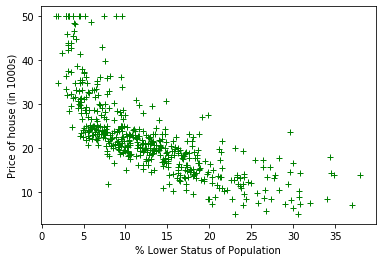

In [8]:
# lSTAT vs MEDV plot

plt.plot(lstat, price, 'g+')
plt.xlabel('% Lower Status of Population')
plt.ylabel('Price of house (in 1000s)')

plt.show()

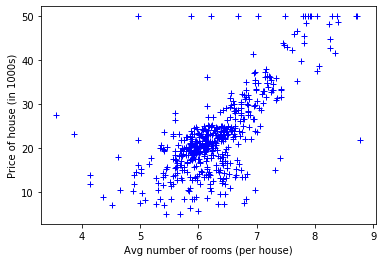

In [9]:
# RM vs MEDV plot

plt.plot(room, price, 'b+')
plt.xlabel('Avg number of rooms (per house)')
plt.ylabel('Price of house (in 1000s)')

plt.show()

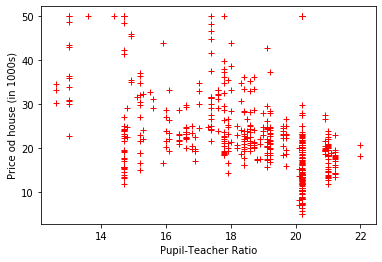

In [10]:
# PTRATIO vs MEDV plot

plt.plot(pt_ratio, price, 'r+')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Price od house (in 1000s)')

plt.show()

In [11]:
# train test split using sklearn

' get X and Y '
Y = data[list(data.columns)[-1]]

selected_columns = ['LSTAT']

X = data[selected_columns]
X_train_lstat, X_test_lstat, Y_train_lstat, Y_test_lstat = train_test_split(X, Y, test_size = 0.2)

X = room
X_train_room, X_test_room, Y_train_room, Y_test_room = train_test_split(X, Y, test_size = 0.2)

X = pt_ratio
X_train_ptratio, X_test_ptratio, Y_train_ptratio, Y_test_ptratio = train_test_split(X, Y, test_size = 0.2)

print(X_train_lstat)
# print(X_test_room)
print(Y_train_lstat)
# print(Y_test_room)

     LSTAT
272   7.73
327  12.79
146  16.65
21   13.83
14   10.26
..     ...
453  16.74
252   3.53
473  11.66
193   5.03
297  15.84

[404 rows x 1 columns]
272    24.4
327    22.2
146    15.6
21     19.6
14     18.2
       ... 
453    17.8
252    29.6
473    29.8
193    31.1
297    20.3
Name: MEDV, Length: 404, dtype: float64


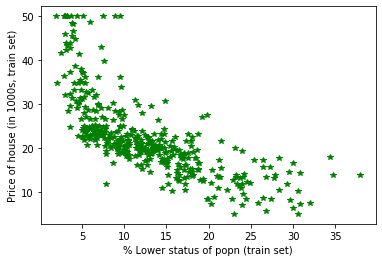

In [12]:
# plot train set data (lstat)

X_train = X_train_lstat
Y_train = Y_train_lstat

plt.plot(X_train, Y_train, 'g*')
plt.xlabel('% Lower status of popn (train set)')
plt.ylabel('Price of house (in 1000s, train set)')

plt.show()

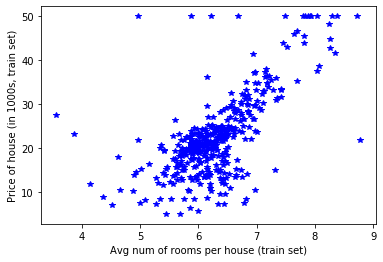

In [13]:
# plot train set data (rm)

X_train = X_train_room
Y_train = Y_train_room

plt.plot(X_train, Y_train, 'b*')
plt.xlabel('Avg num of rooms per house (train set)')
plt.ylabel('Price of house (in 1000s, train set)')

plt.show()

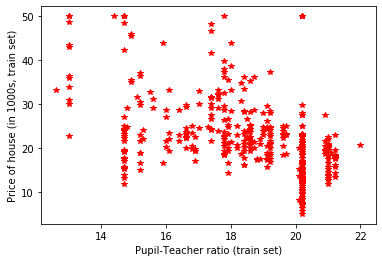

In [14]:
# plot train set data (pt_ratio)


X_train = X_train_ptratio
Y_train = Y_train_ptratio


plt.plot(X_train, Y_train, 'r*')
plt.xlabel('Pupil-Teacher ratio (train set)')
plt.ylabel('Price of house (in 1000s, train set)')

plt.show()

In [15]:
# LINEAR REGRESSION (QUESTION 2)

In [16]:
# change here for different linear regression

X_train = X_train_lstat
X_test = X_test_lstat
Y_train = Y_train_lstat
Y_test = Y_test_lstat

# X_train = X_train_room
# X_test = X_test_room
# Y_train = Y_train_room
# Y_test = Y_test_room

# X_train = X_train_ptratio
# X_test = X_test_ptratio
# Y_train = Y_train_ptratio
# Y_test = Y_test_ptratio

In [17]:
# cost function

def costFunction(xVector, yVector, theta):
    inner = np.power(((xVector * theta.T) - yVector), 2)
    return np.sum(inner) / 2

In [18]:
# pre for linear regression

array_ones = np.ones(len(X_train))
# print(array_ones)
xVector = np.column_stack((array_ones, X_train))
# print(xVector)

# yVector = np.matrix(data['MEDV']).T
yVector = np.matrix(Y_train).T

# print(yVector)

theta = np.matrix(np.array([0.00, 0.00]))
# print(theta.T)

In [19]:
# Linear Regression from scratch

learningRate = 0.0001
iterations = len(X_train)

costs = np.zeros(iterations)

m = np.size(theta,1)

newTheta = theta.T

# print(newTheta)

for iter in range(iterations):
    costs[iter] = costFunction(xVector, yVector, theta)

    for i in range(len(xVector)):
        currentError = yVector[i,0] - (xVector[i,:] * newTheta)
        for j in range(m):
            term = np.multiply(np.multiply(currentError, xVector[i,j]), learningRate) 

            newTheta[j,0] = newTheta[j,0] + term
    #         print(i, j, newTheta)
print(newTheta)
# print(costs)

[[33.70346107]
 [-0.94388185]]


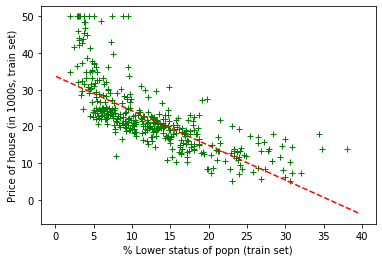

In [20]:
# linear regressoin on actual data

t0 = float(newTheta[0])
t1 = float(newTheta[1])

plt.plot(X_train,Y_train,'g+')
# plt.plot(X_train,t0 + t1*X_train,'r*')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = t0 + t1 * x_vals
plt.plot(x_vals, y_vals, 'r--')
plt.xlabel('% Lower status of popn (train set)')
plt.ylabel('Price of house (in 1000s, train set)')
    
plt.show()

In [21]:
'''
# evaluation of test dataset

array_ones_test = np.ones(len(X_test))
# print(array_ones_test)

xVectorTest = np.column_stack((array_ones_test, X_test))
# print(xVectorTest)

y_test_predict = xVectorTest * newTheta
# print(y_test_predict)

yVectorTest = np.matrix(Y_test).T
# print(yVectorTest)

plt.plot(X_test,Y_test,'g+')
# plt.plot(X_test,t0 + t1*X_test,'r*')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = t0 + t1 * x_vals
plt.plot(x_vals, y_vals, 'r--')

plt.show()
'''

"\n# evaluation of test dataset\n\narray_ones_test = np.ones(len(X_test))\n# print(array_ones_test)\n\nxVectorTest = np.column_stack((array_ones_test, X_test))\n# print(xVectorTest)\n\ny_test_predict = xVectorTest * newTheta\n# print(y_test_predict)\n\nyVectorTest = np.matrix(Y_test).T\n# print(yVectorTest)\n\nplt.plot(X_test,Y_test,'g+')\n# plt.plot(X_test,t0 + t1*X_test,'r*')\n\naxes = plt.gca()\nx_vals = np.array(axes.get_xlim())\ny_vals = t0 + t1 * x_vals\nplt.plot(x_vals, y_vals, 'r--')\n\nplt.show()\n"

In [22]:
# rmse of test set

# np.sqrt(mean_squared_error(yVectorTest, y_test_predict))

In [23]:
# Normalize Part from here (QUESTION 3)

In [24]:
# Normalizing function
def normalize(X): 
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X

# xdata = data['LSTAT']
# xdata_norm = normalize(xdata)

In [25]:
X_train_norm = normalize(X_train)
# X_train_norm
Y_train_norm = normalize(Y_train)
# Y_train_norm
X_test_norm = normalize(X_test)
# X_test_norm
Y_test_norm = normalize(Y_test)
# Y_test_norm

In [26]:
# pre for linear regression (normalize)

array_ones_norm = np.ones(len(X_train_norm))
# print(array_ones_norm)

xVectorNorm = np.column_stack((array_ones_norm, X_train_norm))
# print(xVectorNorm)

yVectorNorm = np.matrix(Y_train_norm).T

# print(yVectorNorm)

theta_norm = np.matrix(np.array([0.00, 0.00]))
# print(theta_norm.T)

In [27]:
# Linear Regression from scratch (normalize)
learningRate = 0.0001
iterations = len(X_train_norm)

costsNorm = np.zeros(iterations)

mNorm = np.size(theta_norm,1)

newThetaNorm = theta_norm.T

# print(newTheta)

for iter in range(iterations):
    costsNorm[iter] = costFunction(xVectorNorm, yVectorNorm, theta_norm)

    for i in range(len(xVectorNorm)):
        currentErrorNorm = yVectorNorm[i,0] - (xVectorNorm[i,:] * newThetaNorm)
        for j in range(mNorm):
            termNorm = np.multiply(np.multiply(currentErrorNorm,xVectorNorm[i,j]),learningRate) 

            newThetaNorm[j,0] = newThetaNorm[j,0] + termNorm
    #       print(i, newThetaNorm)
print(newThetaNorm)
# print(costs)

[[ 0.46356415]
 [-0.26762182]]


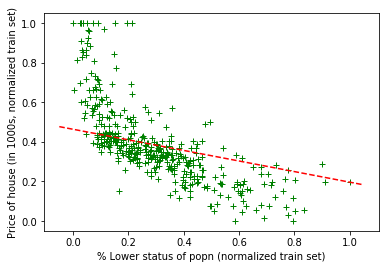

In [28]:
# linear regressoin on actual data (normalize)

t0 = float(newThetaNorm[0])
t1 = float(newThetaNorm[1])

plt.plot(X_train_norm,Y_train_norm,'g+')
# plt.plot(X_train_norm,t0 + t1*X_train_norm,'r*')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = t0 + t1 * x_vals
plt.plot(x_vals, y_vals, 'r--')
plt.xlabel('% Lower status of popn (normalized train set)')
plt.ylabel('Price of house (in 1000s, normalized train set)')

plt.show()

In [29]:
'''
#evaluation of test dataset (normalize)

array_ones_test_norm = np.ones(len(X_test_norm))
# print(array_ones_test_norm)

xVectorTestNorm = np.column_stack((array_ones_test_norm, X_test_norm))
# print(xVectorTest)

y_test_predict_norm = xVectorTestNorm * newThetaNorm
# print(y_test_predict)

yVectorTestNorm = np.matrix(Y_test_norm).T
# print(yVectorTestNorm)

plt.plot(X_test_norm,Y_test_norm,'g+')
# plt.plot(X_test_norm,t0 + t1*X_test_norm,'r*')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = t0 + t1 * x_vals
plt.plot(x_vals, y_vals, 'r--')

plt.show()
'''

"\n#evaluation of test dataset (normalize)\n\narray_ones_test_norm = np.ones(len(X_test_norm))\n# print(array_ones_test_norm)\n\nxVectorTestNorm = np.column_stack((array_ones_test_norm, X_test_norm))\n# print(xVectorTest)\n\ny_test_predict_norm = xVectorTestNorm * newThetaNorm\n# print(y_test_predict)\n\nyVectorTestNorm = np.matrix(Y_test_norm).T\n# print(yVectorTestNorm)\n\nplt.plot(X_test_norm,Y_test_norm,'g+')\n# plt.plot(X_test_norm,t0 + t1*X_test_norm,'r*')\n\naxes = plt.gca()\nx_vals = np.array(axes.get_xlim())\ny_vals = t0 + t1 * x_vals\nplt.plot(x_vals, y_vals, 'r--')\n\nplt.show()\n"

In [30]:
# rmse of test set (normalize)


# np.sqrt(mean_squared_error(yVectorTest, y_test_predict))

In [31]:
# logistic Regression from here (QUESTION 4)

In [32]:
# read csv

data = pd.read_csv('Logisticdataset.csv', delimiter=',')
data

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1
...,...,...,...
95,5.9868,7.3641,0
96,4.6711,6.2592,0
97,7.5810,8.3703,0
98,4.6457,8.5676,0


In [33]:
X = data[data.columns[:-1]].to_numpy()
# print(X)
y = data[data.columns[-1]].to_numpy()
# print(y)

In [34]:
# adds 1 to beginning of X vector
def add_ones(X):
    array_ones = np.ones((X.shape[0], 1))
    return np.concatenate((array_ones, X), axis=1)


In [35]:
XX = add_ones(X)
# XX

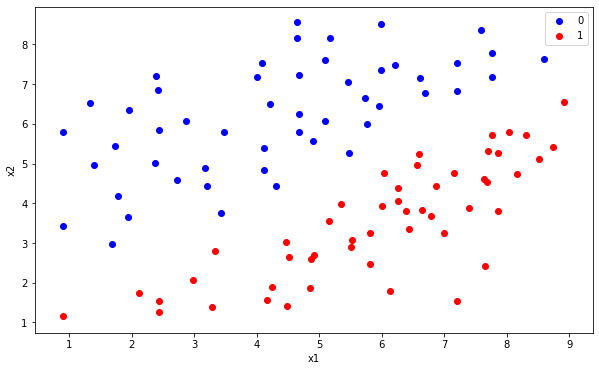

In [36]:
# plotting x1, x2 vs y

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend();

In [37]:
# sigmoid function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [38]:
# loss function

def lossfunction(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [39]:
# function that calculates logistic regression conefficients

def myLogisticRegression(X, verbose=False):
    theta = np.zeros(X.shape[1])
    learning_rate = 0.1
    iterations = len(X)

    for i in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)

        gradient = np.dot(X.T, (h - y)) / y.size

        theta -= learning_rate * gradient
#         print(theta)

        if(verbose==True and i % iterations == 0):
#             print(f'loss: {lossfunction(h, y)} \t')
            print(theta)
#             pass
    return theta

In [40]:
%time theta_calc = myLogisticRegression(XX, True)

[ 0.          0.0406124  -0.06776865]
Wall time: 0 ns


In [41]:
theta_calc

array([ 0.20254295,  1.24114545, -1.4518324 ])

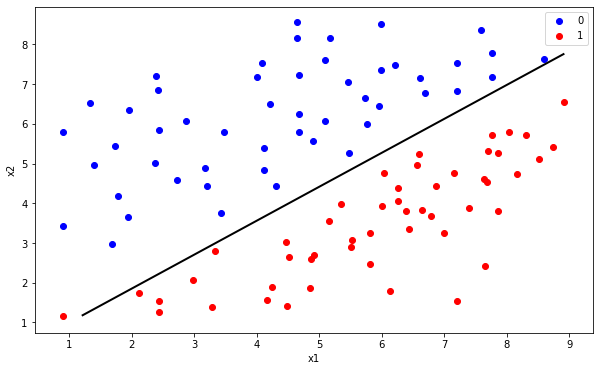

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
# X = XX
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),

# print(x1_min)
# print(x1_max)
# print(x2_min)
# print(x2_max)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# print(xx1)
# print(xx2)

grid = np.c_[xx1.ravel(), xx2.ravel()]

# print(grid)

grid = add_ones(grid)
pro = sigmoid(np.dot(grid, theta_calc))

probs = pro.reshape(xx1.shape)

# print(probs)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');

In [43]:
# Finally solution for Question No 4

print("Coefficients calculated from logistic regression")
print("\u03B80 =", theta_calc[0])
print("\u03B81 =", theta_calc[1])
print("\u03B82 =", theta_calc[2])

Coefficients calculated from logistic regression
θ0 = 0.20254294513724383
θ1 = 1.241145447686426
θ2 = -1.4518323972814373


In [44]:
# QUESTION 5

In [45]:
# modified Logistic Regression as Perceptron Learning Algorithm

def PerceptronLearning(X, verbose=False):
    theta = np.zeros(X.shape[1])
    learning_rate = 0.1
    iterations = len(X)
    h = [None] * iterations
    for i in range(iterations):
        z = np.dot(X, theta)
#         print(z)
        for j in range(len(z)):
            h[j] = 1 if z[j] > 0 else 0
        
#         print('h', h)

        gradient = np.dot(X.T, (h - y)) / y.size

        theta -= learning_rate * gradient
#         print(theta)

        if(verbose==True and i % iterations == 0):
#             print(f'loss: {lossfunction(h, y)} \t')
            print(theta)
#             pass
    return theta

In [46]:
theta_calc_perc = PerceptronLearning(XX, False)

In [47]:
# Coefficients for Perceptron Learning Algorithm

print("Coefficients calculated from perceptron learning algorithm")
print("\u03B80 =", theta_calc_perc[0])
print("\u03B81 =", theta_calc_perc[1])
print("\u03B82 =", theta_calc_perc[2])

Coefficients calculated from perceptron learning algorithm
θ0 = 0.10500000000000007
θ1 = 0.3692555999999987
θ2 = -0.42804630000000204


In [48]:
# function to preprocess input values for prediction, used by predict function
def preprocess(X):
    X.insert(0,1) # insert 1 at beginning
    # print(X)
    return np.array(X)

In [49]:
# prediction using perceptron learning algorithm 
def threshold_function(z):
    return z > 0

In [50]:
# predicts output for given input X and learned theta

def predict(X, theta):
    preprocess(X)
    
    z = np.dot(X, theta)
    # print(z)
    
    h = threshold_function(z)
    # print(h)
    
    return 1 if h else 0

In [51]:
# question 5 run

input_X = [5.8097,2.4711]

res = predict(input_X, theta_calc_perc)

In [52]:
print('Value of Y for', input_X, 'is:', res)

Value of Y for [1, 5.8097, 2.4711] is: 1
